## Parte 1

In [46]:
import numpy as np

mean1 = 5
mean2 = -5
mean3 = 0

std1 = 1
std2 = std1
std3 = std1

N = 5000

In [47]:
X1 = np.random.normal(mean1, std1, N) # Normal distribution
X2 = np.random.normal(mean2, std2, N)
X3 = np.random.normal(mean3, std3, N)

X1 = np.expand_dims(X1, axis=1) # shape (5000, 0) to (5000, 1)
X2 = np.expand_dims(X2, axis=1)
X3 = np.expand_dims(X3, axis=1)
print(X1.shape)

(5000, 1)


In [48]:
Xu = np.hstack((X1, X2, X3)) # horizontal stack arrays, p=3, N=5000
print(Xu.shape)

(5000, 3)


In [49]:
Cd = np.array([[1, 1.8, -0.9], [1.8, 4, 0.6], [-0.9, 0.6, 9]])
print(Cd)

[[ 1.   1.8 -0.9]
 [ 1.8  4.   0.6]
 [-0.9  0.6  9. ]]


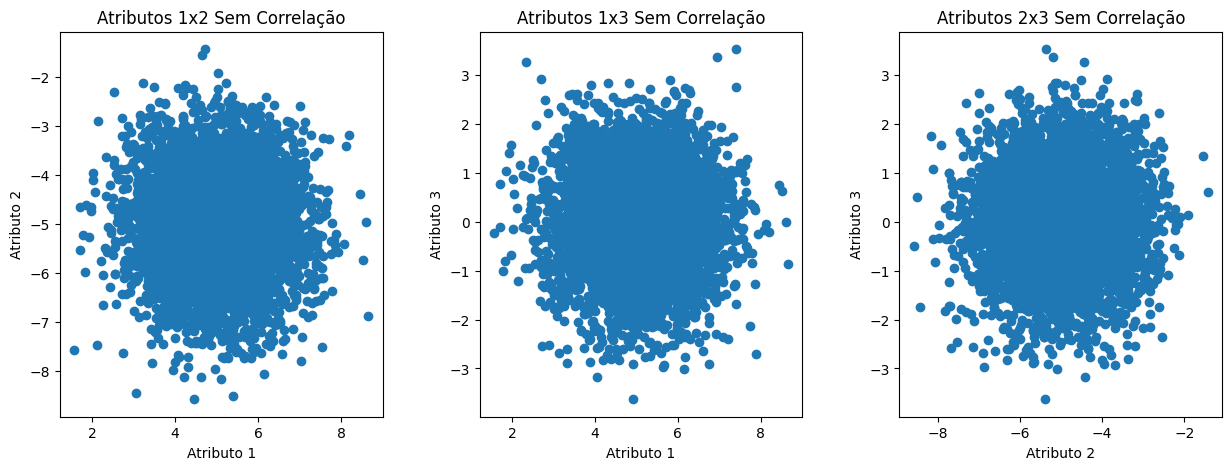

In [50]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(Xu[:, 0], Xu[:, 1])
axes[0].set_title("Atributos 1x2 Sem Correlação")
axes[0].set_xlabel('Atributo 1')
axes[0].set_ylabel('Atributo 2')

axes[1].scatter(Xu[:, 0], Xu[:, 2])
axes[1].set_title("Atributos 1x3 Sem Correlação")
axes[1].set_xlabel('Atributo 1')
axes[1].set_ylabel('Atributo 3')

axes[2].scatter(Xu[:, 1], Xu[:, 2])
axes[2].set_title("Atributos 2x3 Sem Correlação")
axes[2].set_xlabel('Atributo 2')
axes[2].set_ylabel('Atributo 3')
    
plt.subplots_adjust(wspace=0.3)
plt.show()

In [51]:
R = np.linalg.cholesky(Cd)
Xc = np.dot(Xu, R.T)
print(Xc.shape)

(5000, 3)


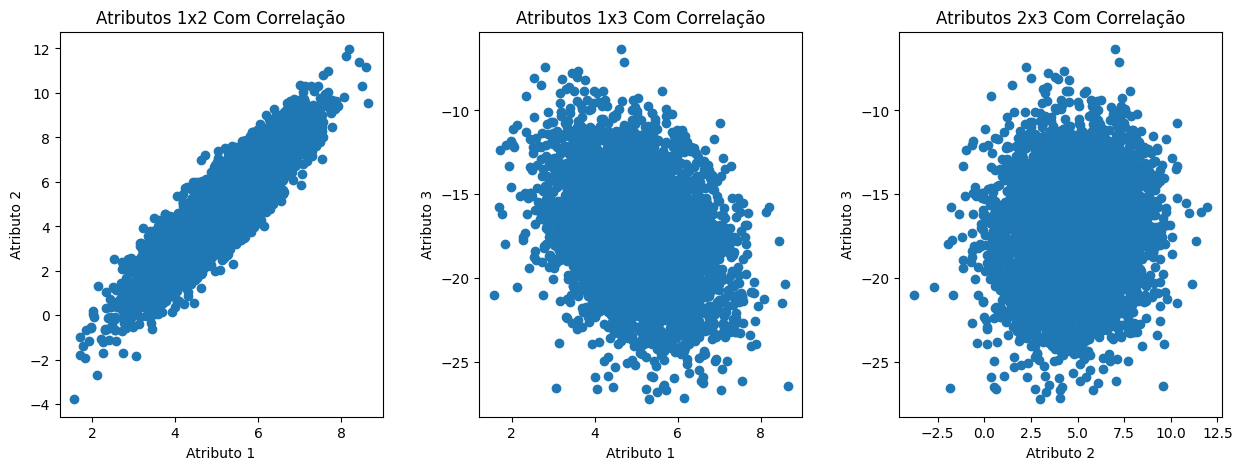

In [52]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(Xc[:, 0], Xc[:, 1])
axes[0].set_title("Atributos 1x2 Com Correlação")
axes[0].set_xlabel('Atributo 1')
axes[0].set_ylabel('Atributo 2')

axes[1].scatter(Xc[:, 0], Xc[:, 2])
axes[1].set_title("Atributos 1x3 Com Correlação")
axes[1].set_xlabel('Atributo 1')
axes[1].set_ylabel('Atributo 3')

axes[2].scatter(Xc[:, 1], Xc[:, 2])
axes[2].set_title("Atributos 2x3 Com Correlação")
axes[2].set_xlabel('Atributo 2')
axes[2].set_ylabel('Atributo 3')
    
plt.subplots_adjust(wspace=0.3)
plt.show()

## Parte 2

Variâncias explicada por cada autovalor: [65.74564236 34.05284618  0.20151146]
Variâncias explicadas acumulativas: [ 65.74564236  99.79848854 100.        ]
Autovetores:
 [[-0.10147333  0.4293604  -0.89741451]
 [ 0.06332394  0.90302912  0.42488644]
 [ 0.99282085 -0.01371319 -0.11882216]]


Text(0, 0.5, 'Variancia Explicada')

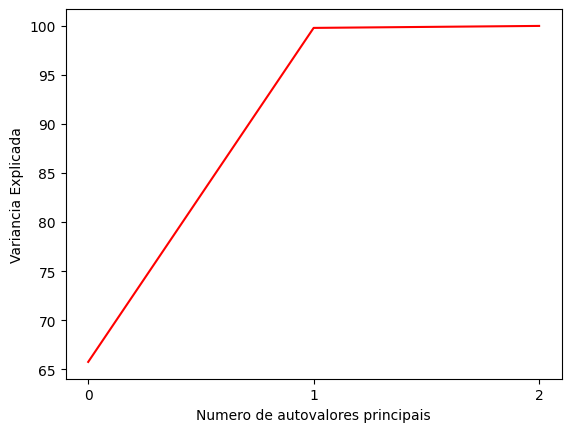

In [53]:
Cx = np.cov(Xc, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(Cx)

idxs = eigenvalues.argsort()[::-1] # Índices do maior para o menor
eigenvalues = np.sort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, idxs] # Montagem de autovetores pelos índices
Vq = eigenvectors

var_i = 100 * eigenvalues / np.sum(eigenvalues) # Variancia explicada pelo i-esimo autovalor
var_q = 100 * np.cumsum(eigenvalues) / np.sum(eigenvalues) # Variancia explicada pelos q primeiros autovalores

print("Variâncias explicada por cada autovalor:", var_i)
print("Variâncias explicadas acumulativas:", var_q)
print("Autovetores:\n", Vq)

plt.plot(var_q, color='red')
plt.xticks(np.arange(0, 3, step=1))
plt.xlabel('Numero de autovalores principais')
plt.ylabel('Variancia Explicada')

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3) # Sem redução de dimensionalidade
pca.fit(Xc)

print("Variâncias explicada por cada autovalor (referência):", 100*pca.explained_variance_ratio_)
print("Variâncias explicadas acumulativas (referência):", np.cumsum(100*pca.explained_variance_ratio_))

Variâncias explicada por cada autovalor (referência): [65.74564236 34.05284618  0.20151146]
Variâncias explicadas acumulativas (referência): [ 65.74564236  99.79848854 100.        ]


In [55]:
orthov = Vq @ Vq.T
print("Verificando se a matriz de autovetores é ortonormal: Multiplicando ela por sua transposta")
print(orthov)
print("\nArredondando:")
print(np.round(orthov))

Verificando se a matriz de autovetores é ortonormal: Multiplicando ela por sua transposta
[[ 1.00000000e+00  1.39083459e-16 -7.30697568e-17]
 [ 1.39083459e-16  1.00000000e+00 -2.36026361e-16]
 [-7.30697568e-17 -2.36026361e-16  1.00000000e+00]]

Arredondando:
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [-0. -0.  1.]]


In [56]:
Vq_inv = np.linalg.inv(Vq)
print("Verificando se a matriz de autovetores é ortonormal: Invertendo e comparando com a transposta")
print(Vq_inv)
print(Vq.T)

Verificando se a matriz de autovetores é ortonormal: Invertendo e comparando com a transposta
[[-0.10147333  0.06332394  0.99282085]
 [ 0.4293604   0.90302912 -0.01371319]
 [-0.89741451  0.42488644 -0.11882216]]
[[-0.10147333  0.06332394  0.99282085]
 [ 0.4293604   0.90302912 -0.01371319]
 [-0.89741451  0.42488644 -0.11882216]]


## Parte 3

In [67]:
u, s, v = np.linalg.svd(Cx) # Com uso do SVD
print("Autovalores ordenados (porcentagem)", 100 * s / np.sum(s))
print("Autovalores ordenados", s)
print("Matriz de autovetores\n", v.T)

Autovalores ordenados (porcentagem) [65.74564236 34.05284618  0.20151146]
Autovalores ordenados [9.31967368 4.82710949 0.02856495]
Matriz de autovetores
 [[-0.10147333 -0.4293604   0.89741451]
 [ 0.06332394 -0.90302912 -0.42488644]
 [ 0.99282085  0.01371319  0.11882216]]


## Parte 4

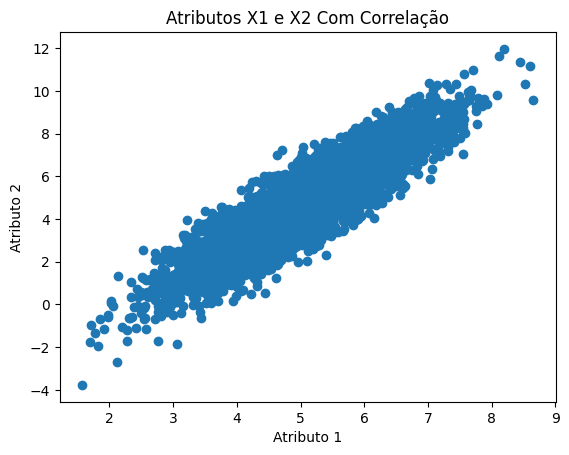

In [68]:
plt.scatter(Xc[:, 0], Xc[:, 1])
plt.title("Atributos X1 e X2 Com Correlação")
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.show()

In [69]:
Z = np.dot(Xc, Vq)
Cz = np.cov(Z, rowvar=False)
print(Cz)
print(np.round(Cz))

non_diagonal_values = Cz[~np.eye(Cz.shape[0], dtype=bool)]
print(non_diagonal_values)

[[ 9.31967368e+00 -2.77451374e-15  2.07875325e-16]
 [-2.77451374e-15  4.82710949e+00 -3.38108328e-16]
 [ 2.07875325e-16 -3.38108328e-16  2.85649516e-02]]
[[ 9. -0.  0.]
 [-0.  5. -0.]
 [ 0. -0.  0.]]
[-2.77451374e-15  2.07875325e-16 -2.77451374e-15 -3.38108328e-16
  2.07875325e-16 -3.38108328e-16]


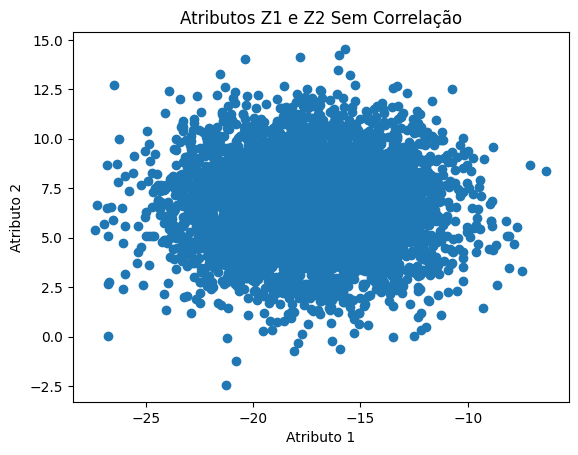

In [60]:
plt.scatter(Z[:, 0], Z[:, 1])
plt.title("Atributos Z1 e Z2 Sem Correlação")
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.show()

## Parte 5

In [72]:
Xr = np.dot(Z, Vq.T) # Reconstrucao dos dados originais
print(Xr[:4,:])
print(Xc[:4,:])
print(Xr[:4,:]-Xc[:4,:])

[[  5.50583245   4.56105112 -23.87477673]
 [  4.38908114   1.914298   -21.25898865]
 [  4.97979974   5.32179983 -14.72428439]
 [  4.1640778    3.89486124 -15.51369081]]
[[  5.50583245   4.56105112 -23.87477673]
 [  4.38908114   1.914298   -21.25898865]
 [  4.97979974   5.32179983 -14.72428439]
 [  4.1640778    3.89486124 -15.51369081]]
[[2.66453526e-15 6.21724894e-15 0.00000000e+00]
 [1.77635684e-15 5.32907052e-15 7.10542736e-15]
 [2.66453526e-15 3.55271368e-15 0.00000000e+00]
 [1.77635684e-15 3.99680289e-15 1.77635684e-15]]


In [62]:
E = Xc - Xr
norm = np.linalg.norm(E, 'fro')**2 # Norma de Frobenius para calcular o erro
print("Norma:", norm)

Norma: 1.3226496033901478e-25


In [63]:
E = E.flatten()  # Vetoriza matriz de erro
SSE = np.sum(E**2)  # Soma dos erros quadráticos de reconstrução

print("SSE:", SSE)

SSE: 1.3226496033901478e-25
